# Descriptive Analysis

## Introduction
This is a case-study for a bike-sharing company with a fleet of 5,824 bicycles including (Electric, Classic and Docked Bikes) which are located in a network of 692 stations across Chicago. Bicycles can begin at a station and be returned to any station. The company provides bicycles to annual members and casual riders which come as single-ride passes and full-day passes.
The aim of this project is to understand bike users behaviour and come up with strategies to convert casual members to annual member riders.

In this library, I'll be doing basic analysis on the ride to understand member usage such 
- Total number of rides per month, day and hour, member vs casaul users, 
- Bike Preference
- and provide recommendations using this analysis.

### Import libraries

In [1]:
# Data manipulation packages
import pandas as pd
import numpy as np
import re
# Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns 

### Import data

In [2]:
# Import all the monthly csv dataset
# nov_20 = pd.read_csv(r"./202011-divvy-tripdata.csv")
# dec_20 = pd.read_csv(r'./202012-divvy-tripdata.csv')
# jan_21 = pd.read_csv(r'./202101-divvy-tripdata.csv')
# feb_21 = pd.read_csv(r'./202102-divvy-tripdata.csv')
# march_21 = pd.read_csv(r'./202103-divvy-tripdata.csv')
# april_21 = pd.read_csv(r'./202104-divvy-tripdata.csv')
# may_21 = pd.read_csv(r'./202105-divvy-tripdata.csv')
# jun_21 = pd.read_csv(r'./202106-divvy-tripdata.csv')
# july_21 = pd.read_csv(r'./202107-divvy-tripdata.csv')
# aug_21 = pd.read_csv(r'./202108-divvy-tripdata.csv')
# sept_21 = pd.read_csv(r'./202109-divvy-tripdata.csv')
# oct_21 = pd.read_csv(r'./202110-divvy-tripdata.csv')
# nov_21 = pd.read_csv(r'./202111-divvy-tripdata.csv')

# Import all the monthly csv dataset
nov_20 = pd.read_csv(r"/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202011-divvy-tripdata.csv")
dec_20 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202012-divvy-tripdata.csv')
jan_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202101-divvy-tripdata.csv')
feb_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202102-divvy-tripdata.csv')
march_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202103-divvy-tripdata.csv')
april_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202104-divvy-tripdata.csv')
may_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202105-divvy-tripdata.csv')
jun_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202106-divvy-tripdata.csv')
july_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202107-divvy-tripdata.csv')
aug_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202108-divvy-tripdata.csv')
sept_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202109-divvy-tripdata.csv')
oct_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202110-divvy-tripdata.csv')
nov_21 = pd.read_csv(r'/Users/Razak/Documents/Cyclistic Project/Cyclistic Project/cyclistic project/202111-divvy-tripdata.csv')


# Join all months into a single dataframe
months = [nov_20, dec_20, jan_21, feb_21, march_21, april_21, may_21, jun_21, july_21, aug_21, sept_21, oct_21, nov_21]
df_months = pd.concat(months)

# Get basic information
df_months.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5738812 entries, 0 to 359977
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 613.0+ MB


### Explore data with EDA

In [3]:
# Display the first few rows
df_months.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual


In [4]:
# Check for duplicates
df_months.duplicated().sum()

0

In [5]:
# Check for missing values
df_months.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    675769
start_station_id      675876
end_station_name      725658
end_station_id        725735
start_lat                  0
start_lng                  0
end_lat                 5022
end_lng                 5022
member_casual              0
dtype: int64

In [7]:
# Sort the datafrane by latitude and longitude
df_months = df_months.sort_values(by=['start_lat','start_lng'], ascending=True)

# Apply the forward fill
df_months = df_months.ffill()

# Apply backward fill
df_months = df_months.bfill()

# Reset index
df_months = df_months.reset_index(drop=True)

In [8]:
# Get the number of rows, columns
df_months.shape

(5738812, 13)

### Data Processing
- Convert the data type
- Calculate ride duration (end - start time)

We need to standardize our datetime to match the format [%Y-%m-%d %H:%M:%S]

In [9]:
# Funtion to preprocess datetime string, adding seconds if missing
def preprocess_datetime(dt_str):
    if pd.isna(dt_str):
        return np.nan
    if len(dt_str) == 16:  # Format is missing seconds (YYYY-MM-DD HH:MM)
        return dt_str + ':00'
    # Add leading zero to single-digit hours
    if len(dt_str) == 15 and re.match(r'\d{4}-\d{2}-\d{2} \d:\d{2}', dt_str):
        return dt_str[:11] + '0' + dt_str[11:] + ':00'
    
    # Add leading zero to single-digit hours with missing seconds
    if len(dt_str) == 14 and re.match(r'\d{4}-\d{2}-\d{2} \d:\d{2}', dt_str):
        return dt_str[:11] + '0' + dt_str[11:] + ':00'
    return dt_str

# Apply the preprocessing function to both columns
df_months['started_at'] = df_months['started_at'].apply(preprocess_datetime)
df_months['ended_at'] = df_months['ended_at'].apply(preprocess_datetime)

# Convert to date time
df_months['started_at'] = pd.to_datetime(df_months['started_at'],format='%Y-%m-%d %H:%M:%S')
df_months['ended_at'] = pd.to_datetime(df_months['ended_at'],format='%Y-%m-%d %H:%M:%S')

df_months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5738812 entries, 0 to 5738811
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 569.2+ MB


### Data Extraction

In [10]:
# start day of week [Mon, Tue]
df_months['day'] = df_months['started_at'].dt.day_name()

# start time, from this we can determine if Morn, Afternoon, Night 
df_months['start_time'] = df_months['started_at'].dt.strftime('%H:%M:%S')
df_months['end_time'] = df_months['ended_at'].dt.strftime('%H:%M:%S') # Time when rides ended 
# month
df_months['month'] = df_months['started_at'].dt.strftime("%b-%y")

# Find the ride duration is seconds
df_months['ride_duration'] = (df_months['ended_at']-df_months['started_at']).dt.total_seconds()

# Get basic descriptive stats on the duration
df_months['ride_duration'].describe()

count    5.738812e+06
mean     1.208008e+03
std      1.752267e+04
min     -1.742998e+06
25%      4.090000e+02
50%      7.250000e+02
75%      1.318000e+03
max      3.356649e+06
Name: ride_duration, dtype: float64

In [11]:
week_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
# Order month column
month_order = ['Nov-20','Dec-20','Jan-21','Feb-21','Mar-21','Apr-21','May-21','Jun-21','Jul-21',
               'Aug-21','Sep-21','Oct-21','Nov-21']
day_order = ['Morning','Afternoon','Night']


### Data Cleaning
Remove negative and extreme ride durations using IQR

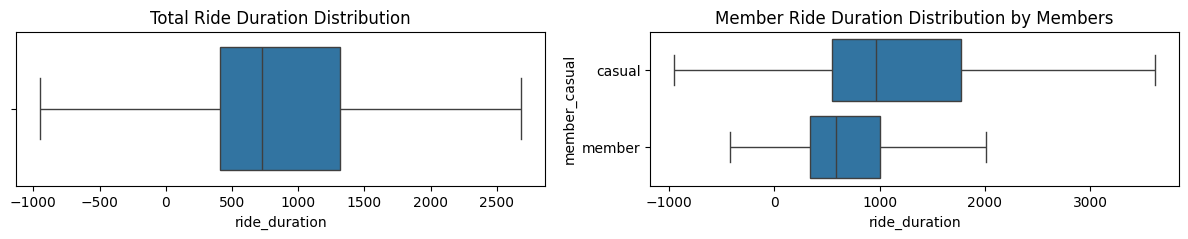

Interquartile range: 909.0
Lower Bound: -954.5
Upper Bound: 2681.5
Mean: 1208.0079748212697


In [12]:
fig, axes = plt.subplots(1, 2, figsize = (15,2))

# Plot 1
sns.boxplot(ax=axes[0], x=df_months['ride_duration'], showfliers = False)
axes[0].set_title('Total Ride Duration Distribution')

# Plot 2
sns.boxplot(ax=axes[1], x = df_months['ride_duration'], y = df_months['member_casual'], showfliers = False)
axes[1].set_title('Member Ride Duration Distribution by Members')
plt.show()

p25 = df_months['ride_duration'].quantile(0.25) # 25th percentile
p50 = df_months['ride_duration'].quantile(0.5) # 50th percentile
p75 = df_months['ride_duration'].quantile(0.75) # 75th percentile

# Interquartile range
iqr = p75 - p25
print(f'Interquartile range: {iqr}')

# Lower Limit
lower_bound  = p25 - 1.5 * iqr
print(f'Lower Bound: {lower_bound}')

# Upper Limit
upper_bound = p75 + 1.5 * iqr
print(f'Upper Bound: {upper_bound}')

# Mean
print(f'Mean: {df_months['ride_duration'].mean()}')

Eliminate outliers

In [13]:
# Eliminate outliers above the upper bound and negative ride durations
df_clean = df_months[(df_months['ride_duration'] >= 0) & (df_months['ride_duration'] <= upper_bound)]

print(f'No of data points after cleaning: {df_clean.shape[0]}')
print(f'Percentage of outliers dropped: {((df_months.shape[0] - df_clean.shape[0])/df_months.shape[0])*100:.2f} %')

No of data points after cleaning: 5313422
Percentage of outliers dropped: 7.41 %


## Exploratory Data Analysis
### Descriptive Analysis
To understand overall usage patterns such as 
- Total number of rides per month, day and hour
- Member vs casaul users
- Bike Usage.

In [14]:
df = df_clean

# Total number of rides
print(f'Total number of rides: {df_clean.count()['ride_id']}')

# members and casual
print(f'Members: {df_clean['member_casual'].value_counts()['member']}') 
print(f'Casual: {df_clean['member_casual'].value_counts()['casual']}') 

Total number of rides: 5313422
Members: 3098377
Casual: 2215045


In [15]:
# Function to calculate the percentage values
def percentage(df, total):

    df['percentage(%)'] = 0

    # Iterate
    for i in range(len(df)):
        df.loc[i, 'percentage(%)'] = (df.loc[i, total]/df[total].sum()) * 100

    # Round to 2 dp
    df['percentage(%)'] = df['percentage(%)'].round(2)

    return df

### Ride Preference by Month, Week and Time of Day

#### 1. Total Rides by Month

In [16]:
print(f'Month with the most number of rides: {df['month'].value_counts().reset_index()['month'][0]} [{df['month'].value_counts().max()}] rides')
print(f'Month with the least number of rides: {df['month'].value_counts().reset_index()['month'][12]} [{df['month'].value_counts().min()}] rides')

# Total number of rides per month
df_tr = df['month'].value_counts().sort_values(ascending=False).reset_index()

# Get the percentage
percentage(df_tr, 'count')

Month with the most number of rides: Jul-21 [751372] rides
Month with the least number of rides: Feb-21 [46881] rides


C:\Users\Razak\AppData\Local\Temp\ipykernel_18868\2792539397.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '14.14101872578538' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'percentage(%)'] = (df.loc[i, total]/df[total].sum()) * 100


,month,count,percentage(%)
0,Jul-21,751372,14.14
1,Aug-21,741695,13.96
2,Sep-21,703765,13.25
3,Jun-21,663577,12.49
4,Oct-21,599363,11.28
5,May-21,477901,8.99
6,Nov-21,349588,6.58
7,Apr-21,307107,5.78
8,Nov-20,241509,4.55
9,Mar-21,209844,3.95


#### Plot the ride comparison for member and casual

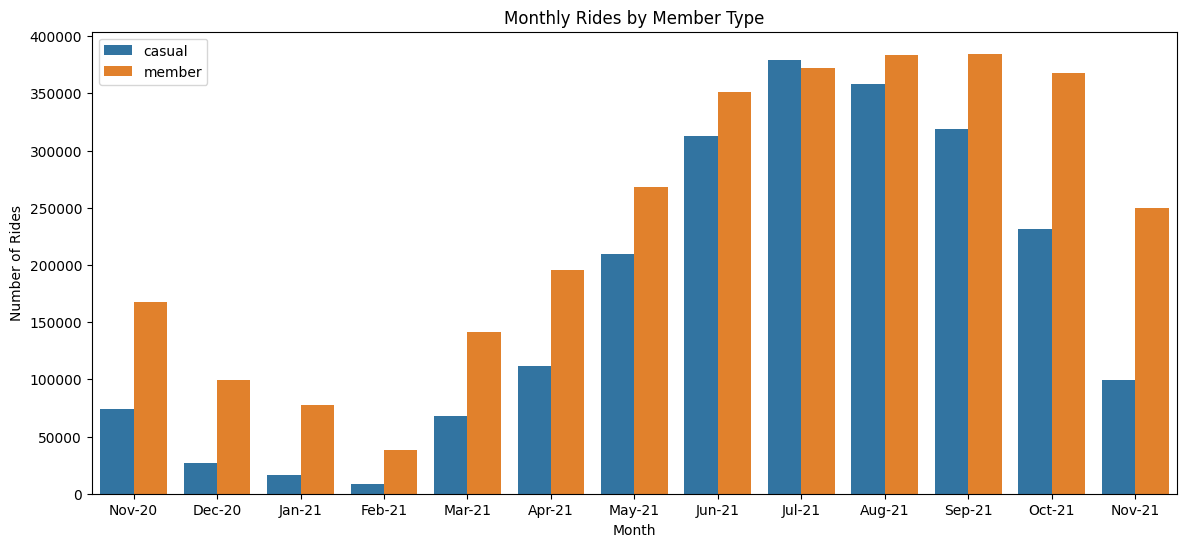

In [17]:
# Aggregate the data - quicker run time
df_mmc = df.groupby(['month','member_casual']).count()['ride_id'].reset_index()

# Plot
plt.figure(figsize = (14,6))
sns.barplot(data = df_mmc, x = 'month', y = 'ride_id', hue = 'member_casual', order=month_order)


plt.title('Monthly Rides by Member Type')
plt.xlabel('Month')
plt.ylabel('Number of Rides')

# Show legend
plt.legend()

# Show graph
plt.show()

### Monthly Observation
- There is a clear seasonal pattern in the usage of the bike-sharing service. Both casual and member rides significantly increase during the warmer months (May to September) and decrease during the colder months (November to February).
- The peak usage for both casual and member riders occurs in the summer months, particularly in July and August.
- There is a noticeable drop in the number of rides during the winter months (December to February). This decline is more pronounced for casual riders compared to members.

### Monthly Recommendations
- Targeted Marketing: Marketing efforts can be intensified in the spring to attract both casual and potential member users in preparation for the peak summer months.
- Organize community events and bike rides during the spring and summer months to boost engagement and attract more casual users.
- Highlight the benefits of membership during the winter months to encourage casual users to become members, ensuring more stable usage throughout the year.

#### 2. Rides by day of week

In [18]:
print(f'The most used day of the week: {df['day'].value_counts().reset_index()['day'][0]} [{df['day'].value_counts().max()}] rides.')
print(f'The least used day of the week: {df['day'].value_counts().reset_index()['day'][6]} [{df['day'].value_counts().min()}] rides.')
df_dw = df['day'].value_counts().sort_values(ascending=False).reset_index()

# Get percentage
percentage(df_dw, 'count')

The most used day of the week: Saturday [918976] rides.
The least used day of the week: Monday [678600] rides.


C:\Users\Razak\AppData\Local\Temp\ipykernel_18868\2792539397.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '17.295370102355882' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'percentage(%)'] = (df.loc[i, total]/df[total].sum()) * 100


,day,count,percentage(%)
0,Saturday,918976,17.30
1,Sunday,787058,14.81
2,Friday,770789,14.51
3,Wednesday,726884,13.68
4,Tuesday,722651,13.60
5,Thursday,708464,13.33
6,Monday,678600,12.77


Narrow to member type

C:\Users\Razak\AppData\Local\Temp\ipykernel_18868\2792539397.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '6.090688825393503' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'percentage(%)'] = (df.loc[i, total]/df[total].sum()) * 100


,day,member_casual,ride_id,percentage(%)
0,Saturday,casual,481094,9.05
1,Wednesday,member,476312,8.96
2,Tuesday,member,475442,8.95
3,Thursday,member,450181,8.47
4,Friday,member,447165,8.42
5,Saturday,member,437882,8.24
6,Monday,member,428614,8.07
7,Sunday,casual,404277,7.61
8,Sunday,member,382781,7.20
9,Friday,casual,323624,6.09


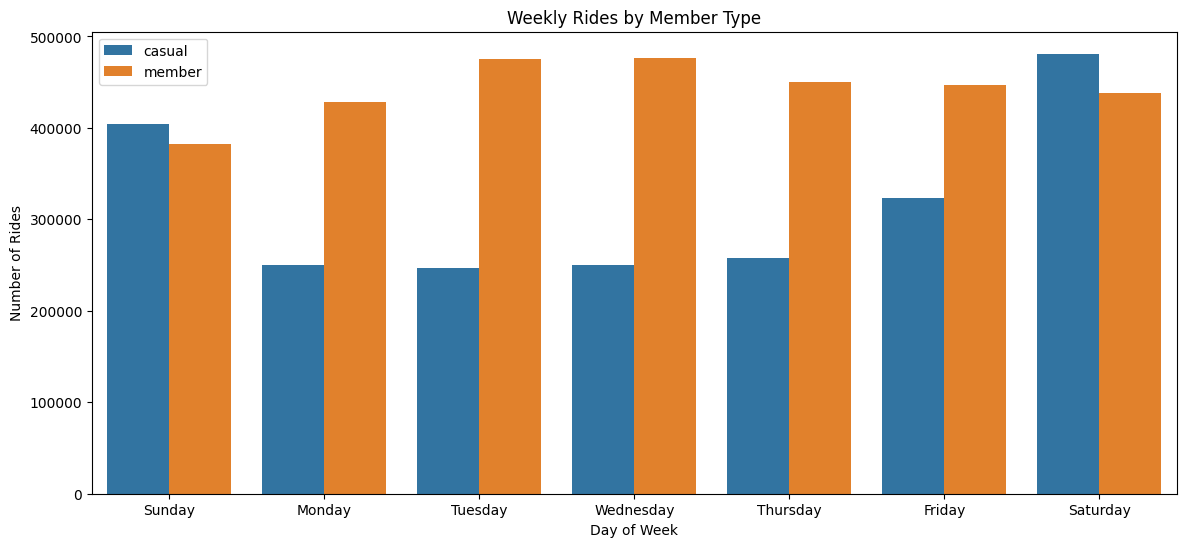

In [19]:
# Aggregate the data - quicker run time
df_dmc = df.groupby(['day','member_casual']).count()['ride_id'].reset_index()

# Plot
plt.figure(figsize = (14,6))
sns.barplot(data = df_dmc, x = 'day', y = 'ride_id', hue = 'member_casual', order= week_order)


plt.title('Weekly Rides by Member Type')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')

# Show legend
plt.legend()

percentage(df_dmc, 'ride_id').sort_values(by=['percentage(%)'], ascending = False).reset_index(drop=True)


#### Summary
- Weekend Usage: Casual riders show significantly higher usage on weekends, with Saturday being the peak day. This suggests that casual riders are likely using the bikes for leisure and recreational purposes.
- Member Usage: Member riders exhibit a more consistent and high usage pattern throughout the week, with a notable peak on Wednesday. This indicates that members might be using the bike-sharing service for regular commuting.
- Weekday Preferences: Members have high usage on Tuesday, Wednesday, Thursday, and Friday, reflecting a preference for using the service during workdays, likely for commuting.

#### 3. Total Rides by period of day

C:\Users\Razak\AppData\Local\Temp\ipykernel_18868\1012835245.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_of_day'] = df['start_time'].apply(day_period)
C:\Users\Razak\AppData\Local\Temp\ipykernel_18868\2792539397.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '18.63196636743703' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'percentage(%)'] = (df.loc[i, total]/df[total].sum()) * 100


,time_of_day,member_casual,ride_id,percentage(%)
0,Afternoon,member,1337800,25.18
1,Afternoon,casual,989995,18.63
2,Morning,member,942664,17.74
3,Night,member,817913,15.39
4,Night,casual,690838,13.00
5,Morning,casual,534212,10.05


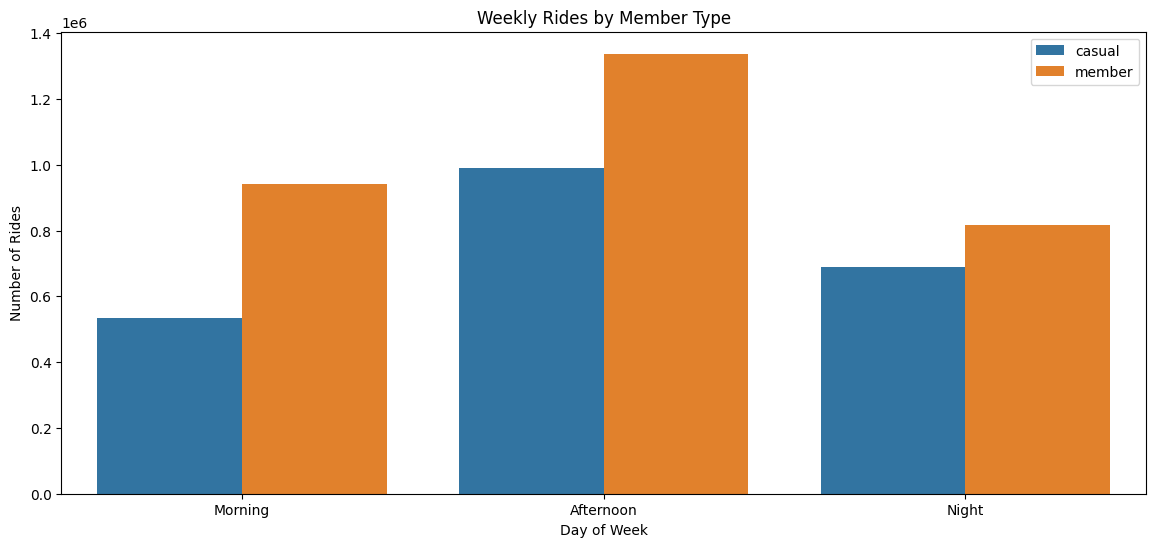

In [20]:
# Creata a column to assign period based on the time

def day_period(time_str):
    hour = int(time_str.split(':')[0])
    if 0 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

# Apply the function to the 'start_time' column
df['time_of_day'] = df['start_time'].apply(day_period)

# Aggregate
df_td = df.groupby(['time_of_day','member_casual']).count()['ride_id'].reset_index()


# Plot
plt.figure(figsize = (14,6))
sns.barplot(data = df_td, x = 'time_of_day', y = 'ride_id', hue = 'member_casual', order=day_order)


plt.title('Weekly Rides by Member Type')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')

# Show legend
plt.legend()

percentage(df_td, 'ride_id').sort_values(by=['percentage(%)'], ascending = False).reset_index(drop=True)

#### Summary 
- Peak Usage: Both casual and member riders prefer biking in the afternoon, making it the busiest time of the day.
- Member Riders: Have a consistent and high usage pattern throughout the day, with a notable peak in the afternoon. Morning and night times also see significant usage, reflecting potential commuting patterns.
- Casual Riders: Show a strong preference for afternoon and night rides, indicating leisure or non-commuting uses. Morning rides are less frequent compared to other times.

### Weekly Recommendations
- Offer promotions and discounts specifically aimed at casual users on weekdays to balance the usage patterns and increase ridership during these days.
- Implement loyalty programs or additional perks for members to encourage continued usage, especially on weekends.
- Organize events or partner with local attractions and businesses on weekends to attract more casual users and potentially convert them into members.

## Bike Preference
We perform a study to know how the different bikes are used then narrow them to our members

In [21]:
# Total Bike Usage
df_bike = df['rideable_type'].value_counts().reset_index()

# Get the % value of rides
percentage(df_bike, 'count')

C:\Users\Razak\AppData\Local\Temp\ipykernel_18868\2792539397.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '56.77414667986093' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'percentage(%)'] = (df.loc[i, total]/df[total].sum()) * 100


,rideable_type,count,percentage(%)
0,classic_bike,3016650,56.77
1,electric_bike,1936708,36.45
2,docked_bike,360064,6.78


Narrow to member type

C:\Users\Razak\AppData\Local\Temp\ipykernel_18868\2792539397.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20.519299991606164' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'percentage(%)'] = (df.loc[i, total]/df[total].sum()) * 100


,rideable_type,member_casual,ride_id,percentage(%)
0,classic_bike,casual,1090277,20.52
1,docked_bike,casual,249308,4.69
2,electric_bike,casual,875460,16.48
3,classic_bike,member,1926373,36.25
4,docked_bike,member,110756,2.08
5,electric_bike,member,1061248,19.97


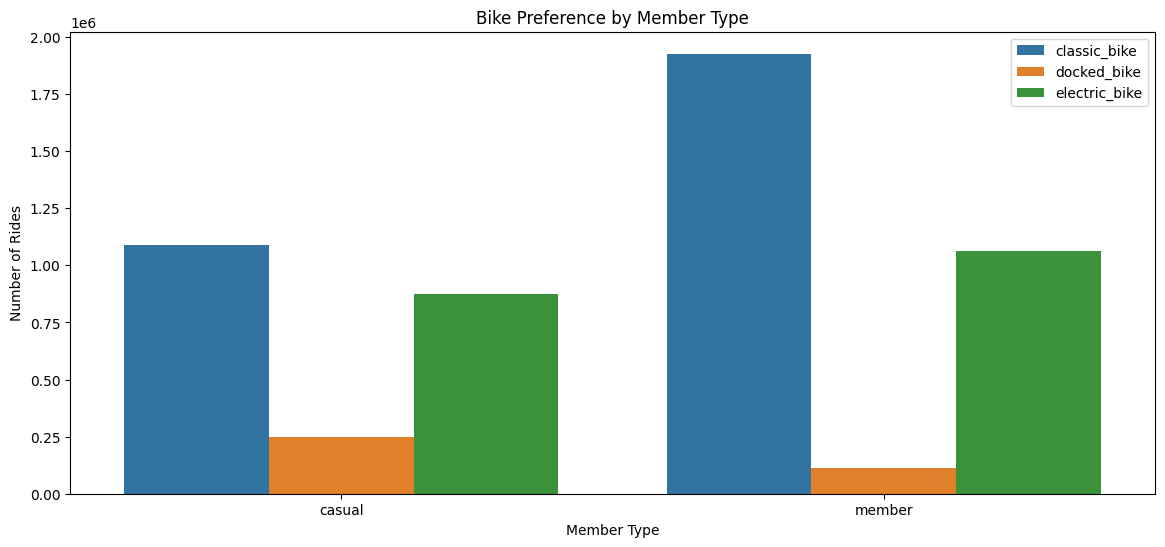

In [22]:
df_bp = df.groupby(['rideable_type','member_casual']).count()['ride_id'].reset_index()

# Plot
plt.figure(figsize = (14,6))
sns.barplot(data = df_bp, x = 'member_casual', y = 'ride_id', hue = 'rideable_type')


plt.title('Bike Preference by Member Type')
plt.xlabel('Member Type')
plt.ylabel('Number of Rides')

# Show legend
plt.legend()

percentage(df_bp, 'ride_id').sort_values(by=['member_casual']).reset_index(drop=True)

#### Summary
- Classic Bikes: Most used bike type for both casual and member riders, with members showing a strong preference.
- Docked Bikes: Least popular among all types, with significantly lower usage, particularly by members.
- Electric Bikes: Moderately popular, with higher usage by members. Their popularity indicates a growing trend towards electric bikes for convenience and speed.